# 1. Import library and read Striker player data

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import preprocessing
striker = pd.read_csv('striker player.csv')
striker['market_value'] = striker['market_value'] 
striker = striker.drop(columns =['Unnamed: 0'])
striker.head()

,league,foot,date,market_value,Apps,Mins,Goals,Assists,Yel,Red,MotM,Rating,age
0,5.0,2.0,2013,675000,19,1163,3,4,0,0,1,7.21,22
1,5.0,2.0,2014,1800000,31,2155,4,3,0,0,2,7.14,23
2,5.0,2.0,2015,6300000,41,3299,18,12,1,0,10,7.72,24
3,5.0,2.0,2016,27000000,45,3613,10,5,5,0,5,7.01,25
4,5.0,2.0,2017,27000000,36,2961,12,10,2,0,5,7.28,26


In [2]:
y = striker['market_value']
x = striker.drop(columns =['market_value'])

In [3]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y , test_size = 0.2, random_state = 3 )

In [4]:
import numpy as np
data_train = pd.DataFrame(x_train, columns = ['league', 'foot','date',  'Apps',  'Mins',  'Goals','Assists', 
                                          'Yel','Red','MotM', 'Rating','age'])
data_train ['market_value'] = np.array(y_train)

data_test = pd.DataFrame(x_test, columns = ['league', 'foot','date',  'Apps',  'Mins',  'Goals','Assists', 
                                          'Yel','Red','MotM', 'Rating','age'])
data_test['market_value'] = np.array(y_test)
data_test

,league,foot,date,Apps,Mins,Goals,Assists,Yel,Red,MotM,Rating,age,market_value
3811,3.0,3.0,2017,7,206,0,0,0,0,0,6.10,20,810000
577,5.0,1.0,2018,8,624,0,1,2,0,0,6.66,23,4050000
1423,2.0,2.0,2019,17,979,3,3,1,0,0,6.66,28,10800000
2201,4.0,1.0,2021,8,210,0,0,0,0,0,6.24,22,360000
2395,4.0,2.0,2012,14,623,2,2,1,0,0,6.72,21,4500000
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2793,4.0,2.0,2014,21,1555,6,3,6,0,0,6.69,26,3600000
499,5.0,1.0,2014,41,2557,6,1,2,0,4,6.83,18,135000
2387,4.0,1.0,2017,36,1778,9,2,3,0,0,6.54,24,9000000
3855,3.0,1.0,2020,37,3140,18,3,4,0,3,7.06,22,3240000


# 4 .Feature selection using Embedded Method and Training Model

# 4.1. Decision Tree

## a . Feature Importance

In [5]:
from sklearn.metrics import r2_score
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
regressor_tree = DecisionTreeRegressor(random_state = 3)
regressor_tree.fit (data_train.drop(columns = ['market_value']) , data_train['market_value'])
print("Train:")
y_pre_train = regressor_tree.predict(data_train.drop(columns = ['market_value']))
print('r2 score :', r2_score(y_pre_train, y_train))
print('rmse  : ' , (mean_squared_error(y_pre_train , y_train)**(1/2)) )

print("Test:")
y_pre_test = regressor_tree.predict(data_test.drop(columns = ['market_value']))
print('r2 score :', r2_score(y_pre_test, y_test))
print('rmse  : ' , (mean_squared_error(y_pre_test , y_test)**(1/2)))

Train:
r2 score : 1.0
rmse  :  0.0
Test:
r2 score : 0.14263589366300777
rmse  :  16794788.44637586


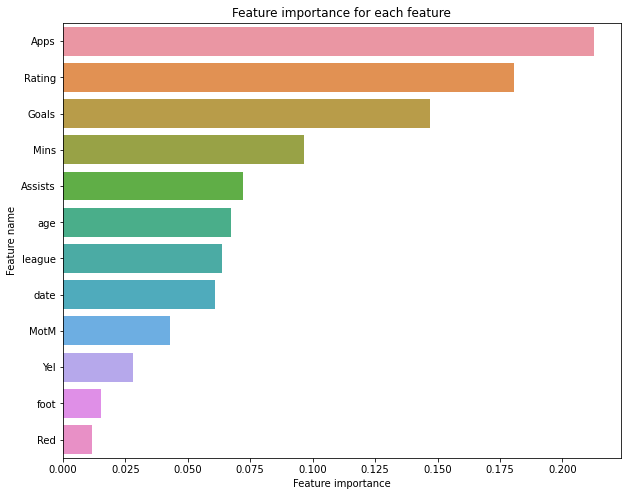

In [6]:
def plot_feature_importance(regressor_tree, data_train):
    
    # Create arrays from feature importance and feature names
    feature_importance = regressor_tree.feature_importances_
    feature_name = data_train.columns[:-1]
    
    # Creaate a dataframe 
    data={'feature_name':feature_name,'feature_importance':feature_importance}
    df = pd.DataFrame(data)
    # Sort the DataFrame in order decreasing feature importance
    df.sort_values(by = ['feature_importance'], ascending=False,inplace=True)
    # Define size of bar plot
    plt.figure(figsize = (10,8))
    #Plot Searborn bar chart
    sns.barplot(x = df['feature_importance'], y = df['feature_name'])
    #Add chart labels
    plt.title('Feature importance for each feature')
    plt.xlabel('Feature importance')
    plt.ylabel('Feature name')
    return data
see_feature_importance = plot_feature_importance(regressor_tree, data_train) 

In [7]:
pd.DataFrame(see_feature_importance)

,feature_name,feature_importance
0,league,0.063849
1,foot,0.015376
2,date,0.061053
3,Apps,0.212724
4,Mins,0.096710
5,Goals,0.147097
6,Assists,0.072113
7,Yel,0.028140
8,Red,0.011641
9,MotM,0.043076


# b .Hyperparameter Tunning

In [8]:
''' from sklearn.model_selection import GridSearchCV
regressor = DecisionTreeRegressor(random_state = 3)
params = {'max_depth':[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13],
         'criterion' :['squared_error', 'friedman_mse', 'absolute_error', 'poisson'],
         'max_features': [None, 0.5,'auto', 'sqrt','log2'],
          'min_samples_leaf':[1, 2, 3, 4, 5]}
scoring_fnc = 'r2'
grid = GridSearchCV(estimator=regressor, param_grid=params, scoring=scoring_fnc, cv=5, verbose= 1 )
grid.fit(data_train.drop(columns = ['market_value','Red','foot','Yel']), data_train['market_value'])
'''

" from sklearn.model_selection import GridSearchCV\nregressor = DecisionTreeRegressor(random_state = 3)\nparams = {'max_depth':[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13],\n         'criterion' :['squared_error', 'friedman_mse', 'absolute_error', 'poisson'],\n         'max_features': [None, 0.5,'auto', 'sqrt','log2'],\n          'min_samples_leaf':[1, 2, 3, 4, 5]}\nscoring_fnc = 'r2'\ngrid = GridSearchCV(estimator=regressor, param_grid=params, scoring=scoring_fnc, cv=5, verbose= 1 )\ngrid.fit(data_train.drop(columns = ['market_value','Red','foot','Yel']), data_train['market_value'])\n"

In [9]:
#grid.best_estimator_.get_params()

In [10]:
# model
model = DecisionTreeRegressor(random_state = 3,
                              criterion = 'friedman_mse', 
                              max_depth = 7 ,
                              max_features = None,
                              min_samples_leaf = 4 )
#predict
model.fit(data_train.drop(columns = ['market_value','Red','foot','Yel','MotM']), data_train['market_value'])

y_pre = model.predict(data_test.drop(columns = ['market_value','Red','foot','Yel','MotM'])) 

print('r2 score :', r2_score(y_pre, y_test))
print('Root mean squraed' ,(mean_squared_error(y_pre,y_test )**(1/2)))
print('Root mean absolute' ,(mean_absolute_error(y_pre,y_test )))

r2 score : 0.043716203133019826
Root mean squraed 13684349.952171061
Root mean absolute 8324372.987862364


# 4.2 .Random Forest

# a .Feature importance

In [11]:
from sklearn.ensemble import RandomForestRegressor
regressor_tree = RandomForestRegressor(random_state = 3)
regressor_tree.fit (data_train.drop(columns = ['market_value']) , data_train['market_value'])
print("Train:")
y_pre_train = regressor_tree.predict(data_train.drop(columns = ['market_value']))
print('r2 score :', r2_score(y_pre_train, y_train))
print('rmse  : ' , (mean_squared_error(y_pre_train , y_train)**(1/2)) )

print("Test:")
y_pre_test = regressor_tree.predict(data_test.drop(columns = ['market_value']))
print('r2 score :', r2_score(y_pre_test, y_test))
print('rmse  : ' , (mean_squared_error(y_pre_test , y_test)**(1/2)))

Train:
r2 score : 0.8873793010499652
rmse  :  5185617.103030582
Test:
r2 score : 0.06887873474947603
rmse  :  12836869.323834646


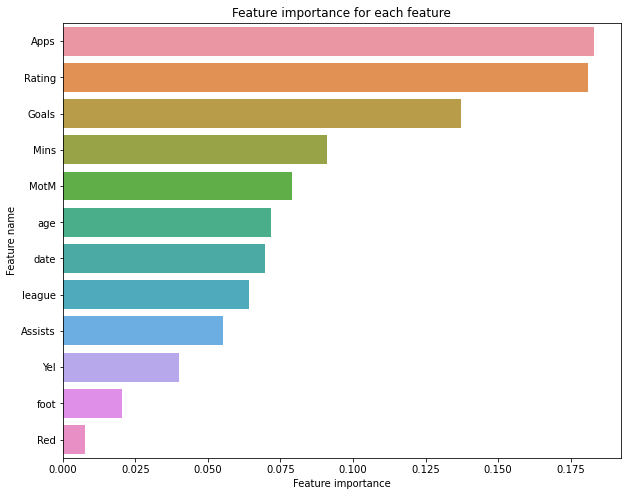

In [12]:
see_feature_importance = plot_feature_importance(regressor_tree, data_train) 

In [13]:
pd.DataFrame(see_feature_importance)

,feature_name,feature_importance
0,league,0.064289
1,foot,0.020352
2,date,0.069767
3,Apps,0.183161
4,Mins,0.091160
5,Goals,0.137091
6,Assists,0.055131
7,Yel,0.039905
8,Red,0.007700
9,MotM,0.078934


# b. Hyperparameter Tunning

In [14]:
from sklearn.model_selection import GridSearchCV
regressor = RandomForestRegressor(random_state = 3)
params = {'n_estimators':[100,300,500],
         'max_features': [None, 0.5,'auto', 'sqrt'],
          'min_samples_leaf':[1,4]
         }
scoring_fnc = 'r2'
grid = GridSearchCV(estimator=regressor, param_grid=params, scoring=scoring_fnc, cv=5, verbose= 1 )
grid.fit(data_train.drop(columns = ['market_value','Red','foot','Yel']), data_train['market_value'])

Fitting 5 folds for each of 24 candidates, totalling 120 fits


GridSearchCV(cv=5, estimator=RandomForestRegressor(random_state=3),
             param_grid={'max_features': [None, 0.5, 'auto', 'sqrt'],
                         'min_samples_leaf': [1, 4],
                         'n_estimators': [100, 300, 500]},
             scoring='r2', verbose=1)

In [15]:
grid.best_estimator_.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'criterion': 'mse',
 'max_depth': None,
 'max_features': None,
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 4,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 300,
 'n_jobs': None,
 'oob_score': False,
 'random_state': 3,
 'verbose': 0,
 'warm_start': False}

In [19]:
# model
model = RandomForestRegressor(random_state = 3,n_estimators = 300,
                              max_features = None,min_samples_leaf = 4
                             )
#predict
model.fit(data_train.drop(columns = ['market_value','Red','foot','Yel']), data_train['market_value'])

y_pre = model.predict(data_test.drop(columns = ['market_value','Red','foot','Yel'])) 

print('r2 score :', r2_score(y_pre, y_test))
print('Root mean squraed' ,(mean_squared_error(y_pre,y_test )**(1/2)))
print('Root mean absolute' ,(mean_absolute_error(y_pre,y_test )))

r2 score : 0.022772572344589626
Root mean squraed 12670496.274624754
Root mean absolute 7883006.757097454
